In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('questions.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [4]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [10]:
df[df.isna().any(axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate
105796,105796,209841,209842,How can I develop android app?,NaN,0
201871,201871,398348,398349,How can I create an Android app?,NaN,0
363416,363416,711434,711435,NaN,My Chinese name is Haichao Yu. What English na...,0


In [9]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
307836,307836,604339,604340,Where do I find the recycle bin on Galaxy S6 t...,How do you delete the recycle bin?,0
142787,142787,5380,282603,What conference has won the most NCAA men's ba...,Will UNC win the NCAA championship in 2015?,0
83878,83878,166589,166590,How can we earn on YouTube?,How do I make money with YouTube?,1
267601,267601,526402,526403,What is it like living in France?,What is it like to live in France?,1
303132,303132,595263,595264,How do I lose weight ayurvedically?,How can I lose weight at age 55?,1
37498,37498,74714,74715,What does the world not know about India and why?,What does the world not know about India?,0
56839,56839,113084,113085,Why does Bhutan have not joined Indian union l...,How can Indian migrate to Bhutan?,0
259773,259773,397413,511237,How does Progressive's Snapshot work? What are...,Has anyone participating in Progressive's Snap...,0
123218,123218,244165,244166,How do I earn money with website?,How do I earn money with a website?,1
179441,179441,354446,354447,Can India be a corruption free country?,What I can do for corruption free India?,1


In [7]:
df.duplicated().sum()

0

#### Distribution of duplicate and non duplicate questions

is_duplicate
0    255045
1    149306
Name: count, dtype: int64

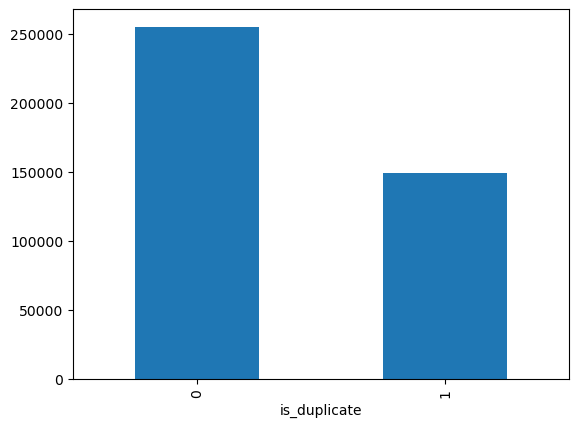

In [16]:
df['is_duplicate'].value_counts().plot(kind='bar')
df['is_duplicate'].value_counts()

#### Repeated questions

In [21]:
qid=pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("number of unique questions",np.unique(qid).shape[0])
x=qid.value_counts()>1
print("number of duplicated questions",x[x].shape[0])

number of unique questions 789801
number of duplicated questions 13698


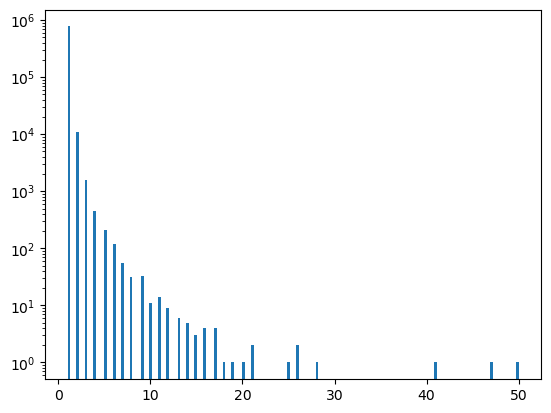

In [35]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()